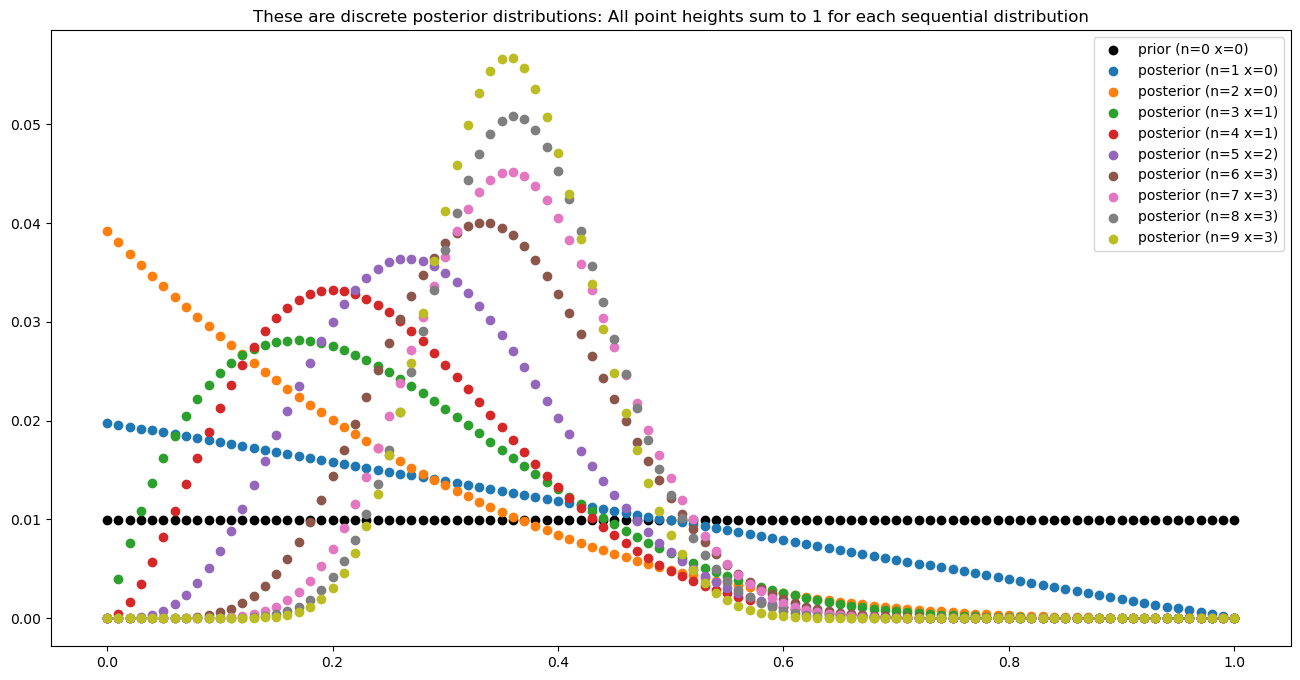

In [1]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation

    likelihood = parameter_domain ** x * (1 - parameter_domain) ** (n - x)

    posterior = likelihood * prior
    posterior /= posterior.sum()

    prior = posterior

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

Final estimate for theta1: 0.300
Final estimate for theta2: 0.601


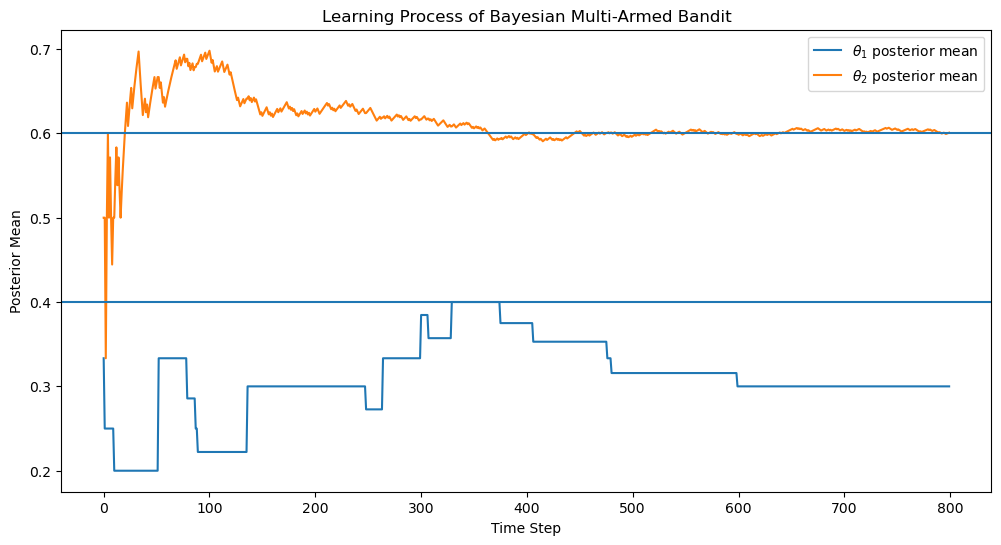

In [5]:
# Q2

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
from scipy.stats import beta
    
theta1_true = 0.4
theta2_true = 0.6

alpha1, beta1 = 1, 1
alpha2, beta2 = 1, 1

n1, x1 = 0, 0
n2, x2 = 0, 0 

m = 800
num_samples = 1000 
 
posterior_means_arm1 = []
posterior_means_arm2 = []

for t in range(m):
    theta1_samples = beta.rvs(alpha1 + x1, beta1 + n1 - x1, size=num_samples)
    theta2_samples = beta.rvs(alpha2 + x2, beta2 + n2 - x2, size=num_samples)
    prob_theta1_less_theta2 = np.mean(theta1_samples < theta2_samples)

    if np.random.rand() < prob_theta1_less_theta2:
        success = np.random.rand() < theta2_true
        n2 += 1
        x2 += success
    else:
        success = np.random.rand() < theta1_true
        n1 += 1
        x1 += success

    posterior_means_arm1.append((alpha1 + x1) / (alpha1 + beta1 + n1))
    posterior_means_arm2.append((alpha2 + x2) / (alpha2 + beta2 + n2))
    
plt.figure(figsize=(12, 6))
plt.plot(posterior_means_arm1, label=r"$\theta_1$ posterior mean")
plt.plot(posterior_means_arm2, label=r"$\theta_2$ posterior mean")
plt.axhline(theta1_true)
plt.axhline(theta2_true)
plt.xlabel("Time Step")
plt.ylabel("Posterior Mean")
plt.title("Learning Process of Bayesian Multi-Armed Bandit")
plt.legend()


print(f"Final estimate for theta1: {(alpha1 + x1) / (alpha1 + beta1 + n1):.3f}")
print(f"Final estimate for theta2: {(alpha2 + x2) / (alpha2 + beta2 + n2):.3f}")



Final posterior mean estimates (Independent Beta-Binomial):
Theta 1: 0.816
Theta 2: 0.400
Theta 3: 0.417

Final posterior mean estimate for Theta (Joint Dirichlet): 0.986


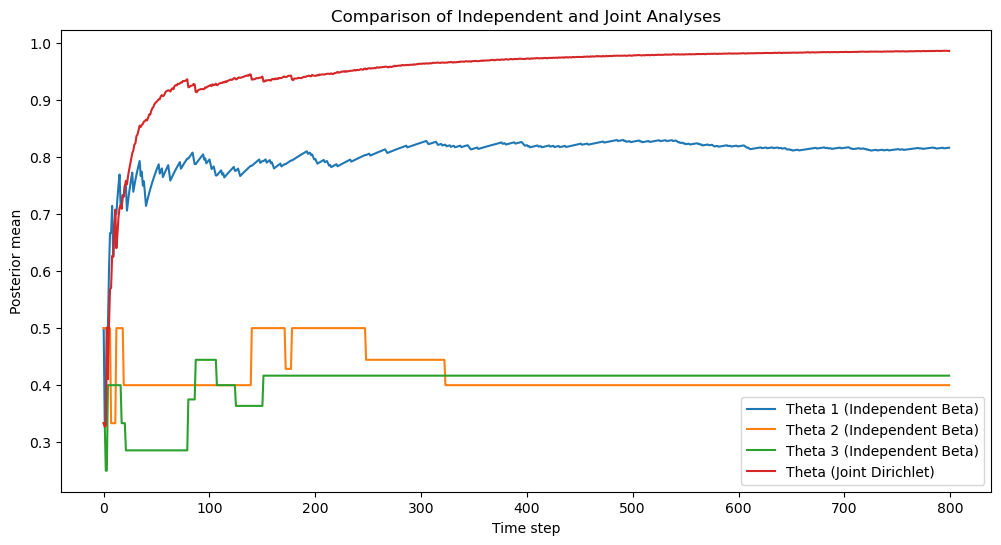

In [7]:
# Q3

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

theta_true = [0.8, 0.4, 0.6]

alpha_prior = [1, 1, 1]  
beta_prior = [1, 1, 1]  

n = [0, 0, 0]  
x = [0, 0, 0]

m = 800
num_samples = 1000
epsilon = 1e-6

posterior_means_independent = [[] for _ in range(3)]
posterior_means_joint = []

for t in range(m):
    theta_samples = [beta.rvs(alpha_prior[i] + x[i], beta_prior[i] + n[i] - x[i], size=num_samples) for i in range(3)]
    
    prob_theta1_best = np.mean((theta_samples[0] > theta_samples[1]) & (theta_samples[0] > theta_samples[2]))

    if np.random.rand() < prob_theta1_best:
        chosen = 0
    elif np.random.rand() < np.mean((theta_samples[1] > theta_samples[2])):
        chosen = 1
    else:
        chosen = 2

    success = np.random.rand() < theta_true[chosen]
    n[chosen] += 1
    x[chosen] += success

    for i in range(3):
        posterior_means_independent[i].append((alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i]))
        
    dirichlet_params = [alpha_prior[i] + x[i] + epsilon for i in range(3)]
    dirichlet_posterior = dirichlet.rvs(dirichlet_params, size=num_samples)

    prob_theta1_best_joint = np.mean((dirichlet_posterior[:, 0] > dirichlet_posterior[:, 1]) &
                                     (dirichlet_posterior[:, 0] > dirichlet_posterior[:, 2]))

    posterior_means_joint.append(np.mean(dirichlet_posterior[:, 0]))

plt.figure(figsize=(12, 6))

for i in range(3):
    plt.plot(posterior_means_independent[i], label=f"Theta {i+1} (Independent Beta)")

plt.plot(posterior_means_joint, label="Theta (Joint Dirichlet)")
plt.xlabel("Time step")
plt.ylabel("Posterior mean")
plt.title("Comparison of Independent and Joint Analyses")
plt.legend()

print("Final posterior mean estimates (Independent Beta-Binomial):")
for i in range(3):
        print(f"Theta {i+1}: {(alpha_prior[i] + x[i]) / (alpha_prior[i] + beta_prior[i] + n[i]):.3f}")
        
print(f"\nFinal posterior mean estimate for Theta (Joint Dirichlet): {posterior_means_joint[-1]:.3f}")
